In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
# try:
#   %tensorflow_version 2.x
# except Exception:
#   pass

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'1.15.0'

In [0]:
#To generate gifs
!pip install imageio

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/garfield"

ga190201.gif  ga190403.gif  ga190804.jpg  ga190903.gif	ga191203.gif
ga190202.gif  ga190404.gif  ga190805.gif  ga190904.gif	ga191204.gif
ga190203.jpg  ga190405.gif  ga190806.gif  ga190905.gif	ga191205.gif
ga190204.gif  ga190406.gif  ga190807.gif  ga190906.gif	ga191206.gif
ga190205.gif  ga190407.jpg  ga190808.gif  ga190907.gif	ga191207.gif
ga190206.gif  ga190408.gif  ga190809.gif  ga190908.jpg	ga191208.jpg
ga190207.gif  ga190409.gif  ga190810.gif  ga190909.gif	ga191209.gif
ga190208.gif  ga190411.gif  ga190811.jpg  ga190910.gif	ga191210.gif
ga190209.gif  ga190412.gif  ga190812.gif  ga190911.gif	ga191211.gif
ga190210.jpg  ga190413.gif  ga190813.gif  ga190912.gif	ga191212.gif
ga190211.gif  ga190414.jpg  ga190814.gif  ga190913.gif	ga191213.gif
ga190212.gif  ga190415.gif  ga190815.gif  ga190914.gif	ga191214.gif
ga190213.gif  ga190416.gif  ga190816.gif  ga190915.jpg	ga191215.jpg
ga190214.gif  ga190417.gif  ga190817.gif  ga190916.gif	ga191216.gif
ga190215.gif  ga190418.gif  ga190818.jpg  ga1909

In [0]:
!pip install python-resize-image

In [0]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
import os
from PIL import Image 
from resizeimage import resizeimage
 
# load all images in a directory into memory
def load_images(path, path2, size=(256,768)):
  src_list, tar_list,image3_list = list(), list(),list()
  for filename in listdir(path):
    if os.path.isfile(path +filename) and not filename.startswith('.'):
      # Converting image to black and white
      image_file = Image.open(path+filename) # open colour image
      # cover = resizeimage.resize_cover(image_file, [200, 100])
      image_file = image_file.convert('1') # convert image to black and white
      image_file.save(path2+filename, image_file.format)
      pixels = load_img(path2 + filename, target_size=size)
      pixels = img_to_array(pixels)
      print("-------------------------------Image--------------------------------------")
      # print(pixels)
      print(pixels.shape)
      # pixels = pixels[:, :,0]
      # elems = pixels.nonzero()
      print("After taking the axis")
      # print(elems.shape)
      # print(elems)
      sat_img, map_img,image3 = pixels[:, :256], pixels[:, 256:512], pixels[:,512:]
      src_list.append(sat_img)
      tar_list.append(map_img)
      src_list.append(image3)
  return [asarray(src_list), asarray(tar_list)]
 
# dataset path
path = "/content/drive/My Drive/Colab Notebooks/garfield/original/"
path2 = "/content/drive/My Drive/Colab Notebooks/garfield/"
# load dataset
[src_images, tar_images] = load_images(path,path2)
print('SRC images : {}'.format(src_images))
# print('TAR images : {}'.format(tar_images))
# print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
# filename = 'maps_256.npz'
# savez_compressed(filename, src_images, tar_images)
# print('Saved dataset: ', filename)
train_images = src_images
#(train_images,train_labels),(_,_)= tf.keras.datasets.mnist.load_data()
print(src_images[0].shape)

-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-------------------------------Image--------------------------------------
(256, 768, 3)
After taking the axis
-

In [0]:
train_images.shape

(298, 256, 256, 3)

In [0]:
train_images = train_images.reshape(train_images.shape[0],256,256,3).astype('float32')

In [0]:
train_images = (train_images - 127.5)/127.5

In [0]:
train_images

In [0]:
BUFFER_SIZE = 6000
BATCH_SIZE = 256

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset

<DatasetV1Adapter shapes: (?, 256, 256, 3), types: tf.float32>

In [0]:
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((7, 7, 256)))
  assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size
  
  model.add(layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False))
  assert model.output_shape == (None, 7, 7, 128)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  
  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 14, 14, 64)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  
  model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 28, 28, 1)
  # model.add(layers.BatchNormalization())
  # model.add(layers.LeakyReLU())

  # model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  # assert model.output_shape == (None, 64, 64, 3)

  return model

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
(1, 100)
Tensor("sequential_1/conv2d_transpose_6/conv2d_transpose:0", shape=(1, 28, 28, 1), dtype=float32)


NotImplementedError: ignored

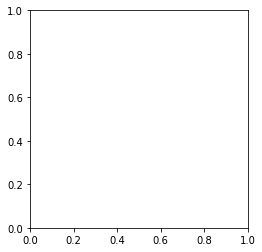

In [0]:
generator = make_generator_model()
print(type(generator))
noise = tf.random.normal([1, 100])
print(noise.shape)
generated_image = generator(noise, training=False)
print(generated_image)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [0]:
def make_discriminator():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[256, 256,3]))

  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128,(5,5), strides=(2,2),padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))

  return model


In [0]:
discriminator = make_discriminator()

decision = discriminator(generated_image)
print(decision)


In [0]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [0]:
#### Discriminator Loss

In [0]:
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [0]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir,"ckpt")
tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                    discriminator_optimizer=discriminator_optimizer,
                    generator=generator,
                    discriminator=discriminator)

### Define the training loop

In [0]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
  tf.random.normal([BATCH_SIZE, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training = True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)


    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator, 
                             epoch + 1,
                             seed)
    
    #Save the model every 15 epochs
    if(epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)
    
    print('Time of epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    #Generate after final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch,
                             seed)

In [0]:
def generate_and_save_images(model,epoch,test_input):
  # Notice training is set to False
  # This is so all layers run in inference mode (batchnorm).

  predictions = model(test_input, training = False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0]*127.5 + 127.5, cmap='gray')
    plt.axis('off')
  
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [0]:
train(train_dataset, EPOCHS)

In [0]:
df = tf.keras.datasets.mnist.load_data()

In [0]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
 
# load all images in a directory into memory
def load_images(path, size=(256,512)):
  src_list, tar_list = list(), list()
	# enumerate filenames in directory, assume all are images
  for filename in listdir(path):
    pixels = load_img(path + filename, target_size=size)
    pixels = img_to_array(pixels)
    sat_img, map_img = pixels[:, :256], pixels[:, 256:]
    src_list.append(sat_img)
    tar_list.append(map_img)
  return [asarray(src_list), asarray(tar_list)]
 
# dataset path
path = 'garfield/'
# load dataset
[src_images, tar_images] = load_images(path)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'maps_256.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)